In [85]:
from faker import  Faker
from collections import namedtuple  
import datetime
from datetime import date 
from decimal import Decimal
import numpy as np
import statistics

In [86]:
fake = Faker()
fake.profile()

{'job': 'Programmer, systems',
 'company': 'Pitts Ltd',
 'ssn': '454-80-4706',
 'residence': '68955 Larson Pines\nNew Charles, WV 19255',
 'current_location': (Decimal('88.8511785'), Decimal('96.971182')),
 'blood_group': 'O+',
 'website': ['https://dixon.com/'],
 'username': 'newtonmichael',
 'name': 'Cole Zamora',
 'sex': 'M',
 'address': '92854 Troy Cape\nKarenbury, SD 75640',
 'mail': 'evansbobby@yahoo.com',
 'birthdate': datetime.date(1919, 5, 3)}

In [87]:
# Python3 code to  calculate age in years 
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
  
    return age 
      
# Driver code  
print(calculateAge(date(1997, 2, 3)), "years") 

23 years


In [88]:
# Declaring namedtuple()   
# Use Faker library to get 10000 random profiles. Using namedtuple, calculate 
# the largest blood type, mean-current_location, oldest_person_age and average age (add proper doc-strings

person = namedtuple('person',['name','blood_type','current_location','age','DOB']) 

In [89]:
'''{'job': 'Engineer, chemical',
 'company': 'Abbott, Fields and Pena',
 'ssn': '718-89-5935',
 'residence': '0834 Allen Motorway Apt. 140\nHoltstad, VT 92824',
 'current_location': (Decimal('10.3555235'), Decimal('147.456652')),
 'blood_group': 'B+',
 'website': ['https://www.lewis.org/', 'http://www.smith.info/'],
 'username': 'brusso',
 'name': 'Lee Robles',
 'sex': 'M',
 'address': 'Unit 3108 Box 6521\nDPO AP 51027',
 'mail': 'stacie34@hotmail.com',
 'birthdate': datetime.date(1932, 7, 24)}'''
def get_named_tuple(population):
    info_list = []
    person = namedtuple('person',['name','blood_type','current_location','DOB']) 
    for i in range(population):
        profile =  fake.profile()
        p = person(profile['name'],profile['blood_group'],profile['current_location'],profile['birthdate'])
        info_list.append(p)
        
    return info_list

In [90]:
def cal_mean_current_location(name_tuple_list):
    lan = []
    lon = []
#     age = []
    for i in name_tuple_list:
        lan.append(i.current_location)
        lon.append(i.current_location)
    return np.mean(lan),np.mean(lon)
    


In [91]:
from decimal import Decimal

price = "14000,45"
price_in_decimal = Decimal(price.replace(',','.'))
price_in_decimal

Decimal('14000.45')

In [92]:
def named_tuple_cal(named_tuple_list):
    t0 = datetime.datetime.now()
    lan = []
    lon = []
    age = []
    blood_group = []
    for i in named_tuple_list:
        lan.append(i.current_location[0])
        lon.append(i.current_location[1])
        age.append(calculateAge(i.DOB))
        blood_group.append(i.blood_type)
    result = statistics.mode(blood_group),(np.mean(lan),np.mean(lon)),np.max(age),np.mean(age)
    t1 = datetime.datetime.now()
    print(f'Time taken for claculation{t1-t0}')
    return result , t1-t0

In [93]:
named_tuple_list = get_named_tuple(population = 1000)
                                   
def named_tuple2dict_list(named_tuple_list):
    dict_list = []
    for i in named_tuple_list:
        dict_list.append(dict(i._asdict()))
    return dict_list

In [94]:
def dict_cal(dict_list):
    t0 = datetime.datetime.now()
    lan = []
    lon = []
    age = []
    blood_group = []
    for i in dict_list:
        lan.append(i['current_location'][0])
        lon.append(i['current_location'][1])
        age.append(calculateAge(i['DOB']))
        blood_group.append(i['blood_type'])
    result = statistics.mode(blood_group), (np.mean(lan),np.mean(lon)),np.max(age),np.mean(age)
    t1 = datetime.datetime.now()
    print(f'Time taken for claculation{t1-t0}')
    return result,t1-t0

In [95]:
nt_result , nt_time_consumption = named_tuple_cal(named_tuple_list)
dict_result , dict_time_consumption = dict_cal(dict_list)

Time taken for claculation0:00:00.090921
Time taken for claculation0:00:00.161689


In [99]:
nt_time_consumption < dict_time_consumption

True

In [13]:
fake.company()

'Gardner, Anderson and Thompson'

In [14]:
# (name, symbol, open, high, close)
import random
def get_symbol(com_name,i):
    symbol = str(i)
    for c in com_name:
        symbol += '_' + c[0]
    return symbol
def get_random_weights():
    return random.uniform(0,100) 
def get_random_open():
    return round((random.uniform(300,1000)),2)
def get_high(open_value):
    return round(open_value*(random.uniform(1,3.0)),3)
def get_close(high_value):
    return round(high_value*(random.uniform(0.2,1.2)),3)
# def

round((random.uniform(300,1000)),2)

651.23

In [15]:
company = namedtuple('company',['name', "symbol", 'open', 'high', 'close'])

In [17]:


def create_fake_companies_list(no_of_companies):
    company = namedtuple('company',['com_name', "symbol", 'open_value', 'high_value', 'close_value','weight'])
    companies_list = []
    weight_list = []
    for i in range(no_of_companies):
        com_name = fake.company()
        symbol = get_symbol(com_name,i)
        weight = get_random_weights()
        open_value = get_random_open()
        high_value = get_high(open_value)
        close_value = get_close(high_value)
        companies_list.append(company(com_name,symbol, open_value, high_value, close_value ,weight))
        weight_list.append(weight)
    return companies_list,weight_list

In [18]:
companies_list,weight_list = create_fake_companies_list(100)

In [31]:

def get_stockmarket_points(companies_list,weight_list):
    open_points = []
    high_points = []
    close_points = []
    sum_weight = sum(weight_list)
    for com in companies_list:
        open_point = com.open_value * com.weight/sum_weight
        high_point = com.high_value * com.weight/sum_weight
        close_point = com.close_value * com.weight/sum_weight
        open_points.append(open_point)
        high_points.append(high_point)
        close_points.append(close_point)
    return round(sum(open_points),2),round(sum(high_points),2),round(sum(close_points),2)


        
open_point,high_point,close_point = get_stockmarket_points(companies_list,weight_list)    

In [80]:
import matplotlib.pyplot as plt

def get_seq_point(open_point,high_point,close_point):
    seq = [high_point]
#     for j in range(2):
    for i  in range(5): 
        r1  = random.randrange(int(open_point-200), int(high_point), 1)
        r2  = random.randrange(int(close_point-200), int(high_point), 1)
        seq.append(r1)
        seq.append(r2)
        random.shuffle(seq)
    seq1 = [open_point]+seq+[close_point]
    return seq1



In [81]:
def plot_stockmarket_points(seq):
    plt.plot(seq)

In [82]:
seq = get_seq_point(open_point,high_point,close_point)
# seq

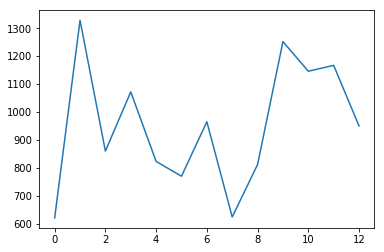

In [83]:
plt.plot(seq)